In [2]:
# Import the necessary libraries first
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df=pd.read_csv('churn (1).csv')
df.head()

,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,8260-NGFNY,One,Month-to-month,No,Mailed check,25.2,25.20,Female,0.0,...,No,No phone service,DSL,No,No,No,No,No,No,Yes
1,2,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.7,4134.85,Female,0.0,...,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
2,3,6598/RFFVI,2,One year,No,Credit card (automatic),19.3,28.30,Male,0.0,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
3,4,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.1,521.30,Female,0.0,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
4,5,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.3,324.20,Female,0.0,...,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No


In [4]:
df.columns

Index(['Unnamed: 0', 'customerID', 'tenure', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Churn'],
      dtype='object')

In [5]:
df_obj=df.select_dtypes(include='object')
df_obj.columns

Index(['customerID', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [6]:
df_obj.isna().sum()

customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
leb=LabelEncoder()

In [8]:
cols=['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

In [9]:
for cl in cols:
    df[cl]=leb.fit_transform(df[cl].astype(str))
df

,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,8260-NGFNY,70,0,0,3,25.20,25.20,0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,2,2359-QWQUL,26,1,1,1,104.70,4134.85,0,0.0,...,1,0,1,2,0,2,2,2,2,1
2,3,6598/RFFVI,11,1,0,1,19.30,28.30,1,0.0,...,1,0,2,1,1,1,1,1,1,1
3,4,IXSTS-8780,48,0,1,2,90.10,521.30,0,0.0,...,1,2,1,0,2,0,0,2,0,1
4,5,2674/MIAHT,69,0,1,3,80.30,324.20,0,0.0,...,1,2,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,253,9318-NKNFC,70,0,1,3,18.85,18.85,1,0.0,...,1,0,2,1,1,1,1,1,1,1
253,254,9067-SQTNS,31,1,0,0,20.60,926.00,1,0.0,...,1,0,2,2,2,1,1,2,1,0
254,255,9067-SQTNS,31,1,0,0,20.60,926.00,1,0.0,...,1,0,2,2,2,1,1,2,1,0
255,256,9067-SQTNS,31,1,0,0,20.60,926.00,1,0.0,...,1,0,2,2,2,1,1,2,1,0


In [12]:
df.isna().sum()

Unnamed: 0           0
customerID           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
gender               0
SeniorCitizen        5
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64

In [16]:
clm=['MonthlyCharges', 'TotalCharges']
df[clm]=df[clm].fillna(df[clm].median())
df.isna().sum()

Unnamed: 0          0
customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       5
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

In [18]:
df.SeniorCitizen.nunique()
df['SeniorCitizen']=df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0])
df.isna().sum()

Unnamed: 0          0
customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

In [19]:
x=df.drop(['Unnamed: 0', 'customerID','Churn'],1)
y=df['Churn']

C:\Users\FRANCI~1.YEG\AppData\Local\Temp/ipykernel_9484/2339289813.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df.drop(['Unnamed: 0', 'customerID','Churn'],1)


In [21]:
# Feature extraction
X_new = SelectKBest(k=7, score_func=chi2).fit_transform(x, y)
X_new

array([[0.00000e+00, 2.52000e+01, 2.52000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.04700e+02, 4.13485e+03, ..., 0.00000e+00,
        2.00000e+00, 2.00000e+00],
       [1.00000e+00, 1.93000e+01, 2.83000e+01, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       ...,
       [1.00000e+00, 2.06000e+01, 9.26000e+02, ..., 2.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.06000e+01, 9.26000e+02, ..., 2.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.06000e+01, 9.26000e+02, ..., 2.00000e+00,
        1.00000e+00, 1.00000e+00]])

In [22]:
jk=pd.DataFrame(X_new)
jk

,0,1,2,3,4,5,6
0,0.0,25.20,25.20,0.0,0.0,0.0,0.0
1,1.0,104.70,4134.85,2.0,0.0,2.0,2.0
2,1.0,19.30,28.30,1.0,1.0,1.0,1.0
3,0.0,90.10,521.30,0.0,2.0,0.0,0.0
4,0.0,80.30,324.20,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
252,0.0,18.85,18.85,1.0,1.0,1.0,1.0
253,1.0,20.60,926.00,2.0,2.0,1.0,1.0
254,1.0,20.60,926.00,2.0,2.0,1.0,1.0
255,1.0,20.60,926.00,2.0,2.0,1.0,1.0


In [23]:
x

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,70,0,0,3,25.20,25.20,0,0.0,0,1,0,1,0,0,0,0,0,0,0
1,26,1,1,1,104.70,4134.85,0,0.0,1,1,1,0,1,2,0,2,2,2,2
2,11,1,0,1,19.30,28.30,1,0.0,0,1,1,0,2,1,1,1,1,1,1
3,48,0,1,2,90.10,521.30,0,0.0,0,1,1,2,1,0,2,0,0,2,0
4,69,0,1,3,80.30,324.20,0,0.0,0,1,1,2,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,70,0,1,3,18.85,18.85,1,0.0,0,1,1,0,2,1,1,1,1,1,1
253,31,1,0,0,20.60,926.00,1,0.0,1,2,1,0,2,2,2,1,1,2,1
254,31,1,0,0,20.60,926.00,1,0.0,1,2,1,0,2,2,2,1,1,2,1
255,31,1,0,0,20.60,926.00,1,0.0,1,2,1,0,2,2,2,1,1,2,1


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

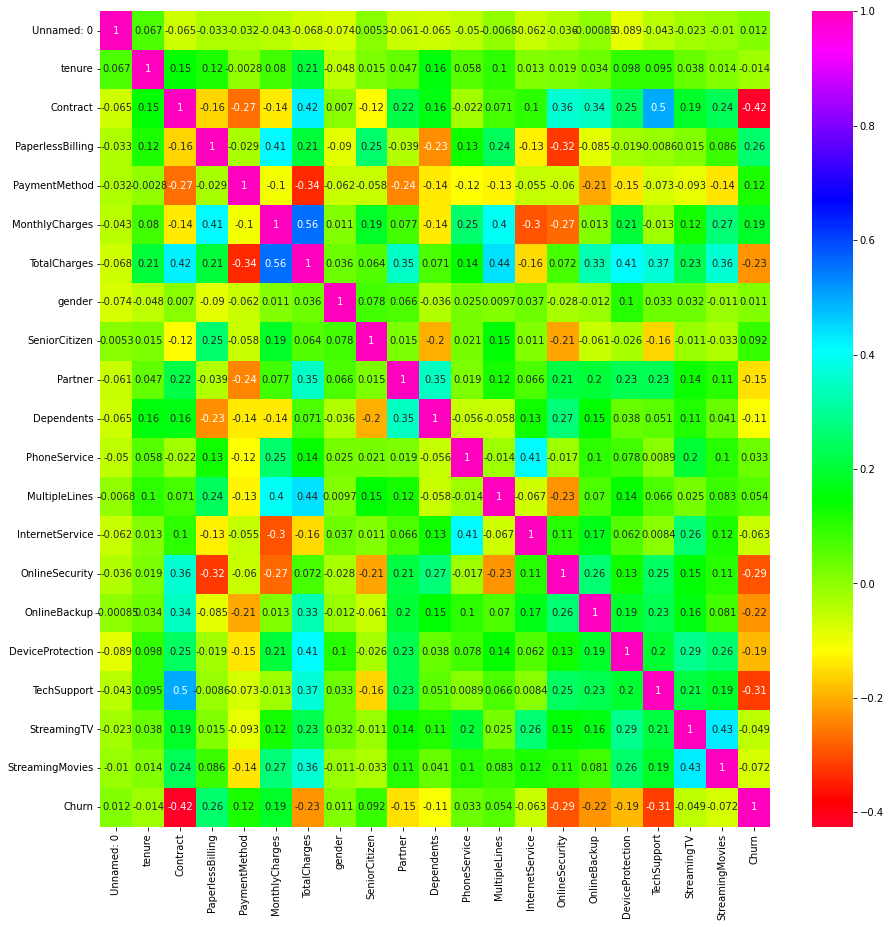

In [31]:
plt.figure(figsize=(15,15))
cor=df.corr()
sns.heatmap(cor, cmap='gist_rainbow', annot=True,)

In [1]:
import pandas as pd

In [2]:
house_value=pd.read_csv('housing (1).csv')
house_value.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [3]:
house_value.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
df_price=pd.get_dummies(house_value, columns=['ocean_proximity'])
df_price.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

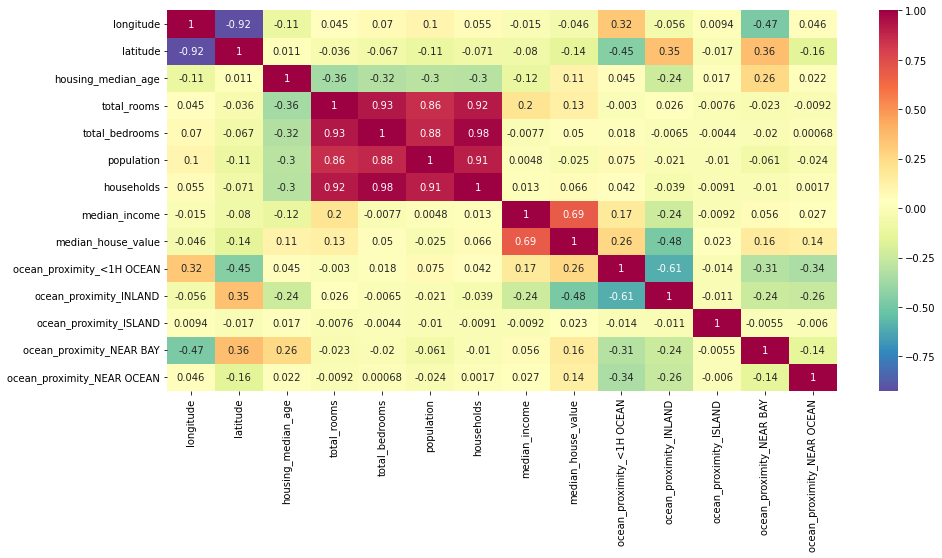

In [7]:
plt.figure(figsize=(15,7))
jackie=df_price.corr()
sns.heatmap(jackie,annot=True, cmap='Spectral_r')

In [13]:
coff=abs(jackie['median_house_value'])
# coff=coff[coff>0.00]
coff.sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_INLAND        0.484859
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
latitude                      0.144160
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
longitude                     0.045967
population                    0.024650
ocean_proximity_ISLAND        0.023416
Name: median_house_value, dtype: float64